In [1]:
import numpy as np
import matplotlib

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
from scipy.stats import uniform

### Spherically symmetric systems
Since the truncated sphere is not a good representation for stellar clusters we have to finde other types of potential that can be more physically relevant for our purpose. 
For this exercise we simulate a $\textbf{Plummer sphere}$.

The density distribution for the Plummer sphere is given by

$$ 
    \rho (r) = \frac{3 M_{TOT}}{4 \pi b^3} \frac{1}{( 1 + \frac{r^2}{b^2})^{\frac{5}{2}}}
$$

where $\text{b}$ is a scale radius. The density is constant in the central region, than it scales as $\frac{1}{r^5}$ for large distances from the center.

Given this mass density profile, we can compute the mass included within a radius R as: 

$$ 
    M(R) = \int_0^R 4 \pi r^2 \rho (r) dr = \dots = \frac{3 M_{tot}}{4 \pi b^3} \frac{1}{\Big(1 + \frac{r^2}{b^2}\Big)^{3/2}}
$$


The probability function for the radii is given by dividing $M(R)$ by the total mass:

$$  P(R) = \frac{M(R)}{M_{TOT}} = \frac{R^3}{b^3} \frac{1}{\Big( 1 + \frac{R^2}{b^2} \Big)^{\frac{3}{2}}} $$

By inverting this relation we can get the distribution for the radii:

$$ R = \sqrt{\frac{b^2P(R)^{2/3}}{1-P(R)^{2/3}}}  $$

For the other coordinates, we have the usual probability functions for spherical symmetry:

$$
    p(\Phi) = \frac{1}{2 \pi}  
$$

$$
    p(\Theta) = \frac{\sin{\theta}}{2}
$$

## Stability of the system

If our system is at the equilibrium we can assume that the total number of particles is unchanged, so we need a bound system which implies a negative total energy. It is also implied that the velocity dispersion should be the same in each direction due to the isotropy of the system. We need to keep into account this fact when we want to generate the velocities distribution for our system.

In order to sample our velocities we can't use the standard methods and so we have to use the $\textbf{Montecarlo rejection method}$.

## Setting the initial parameters

In [4]:
# Initial conditions 
N = 10000
M = 1 # * N
m = M / N
b = 1

Let's sample tha radii:

In [5]:
cdf_r = uniform.rvs(0, 1, size=N)  # cumulative function of r
Rays = np.sqrt((b**2 * cdf_r**(2/3))/(1 - cdf_r**(2/3)))

Generate now the other 2 components:

In [6]:
cdf_theta = uniform.rvs(0, 1, size=N)  # cumulative function of thetas
thetas = np.arccos(1 - 2 * cdf_theta)

phis = uniform.rvs(0, 2 * np.pi, size=N) 

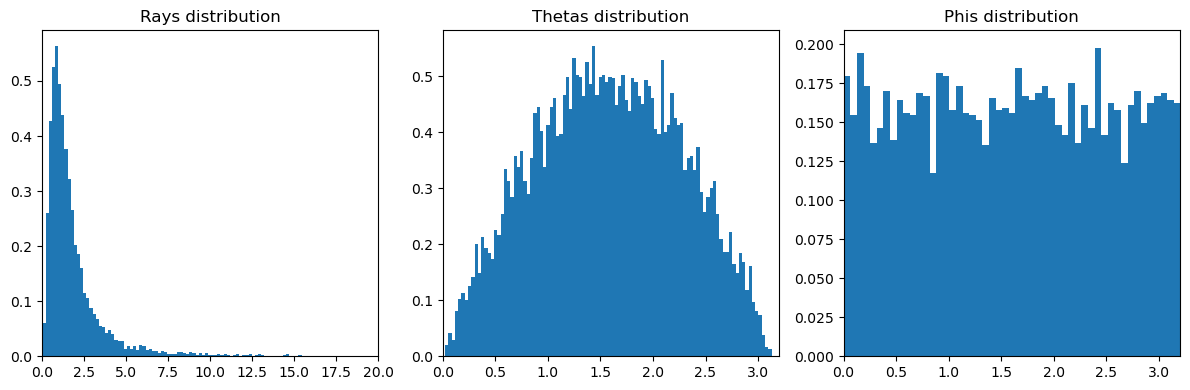

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

raggi = np.linspace(0, 20, 100)
axes[0].hist(Rays, bins=500, density=True)
axes[0].set_title("Rays distribution")
axes[0].set_xlim(0,20)


axes[1].hist(thetas, bins=100, density=True)
axes[1].set_title("Thetas distribution")
axes[1].set_xlim(0,3.2)

axes[2].hist(phis, bins=100, density=True)
axes[2].set_title("Phis distribution")
axes[2].set_xlim(0,3.2)

plt.tight_layout()


Converting now to cartesian coordinates.

In [7]:
x = Rays * np.sin(thetas) * np.cos(phis)
y = Rays * np.sin(thetas) * np.sin(phis)
z = Rays * np.cos(thetas) 

## Plot of the initial spatial distribution

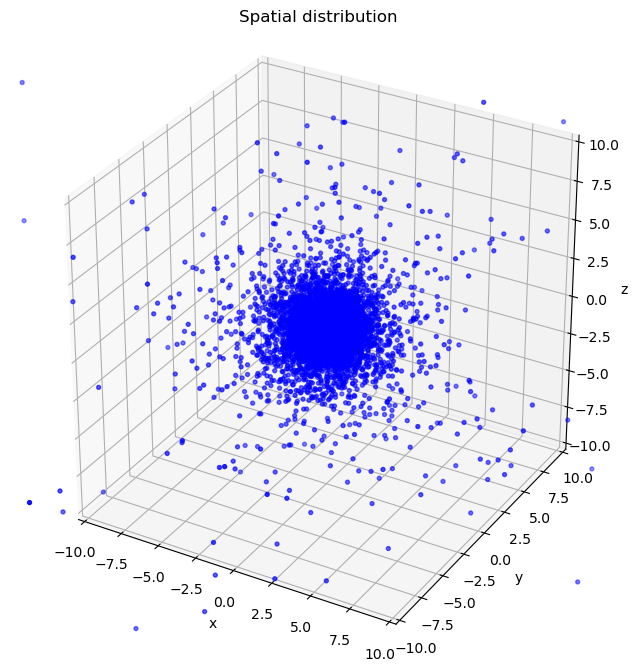

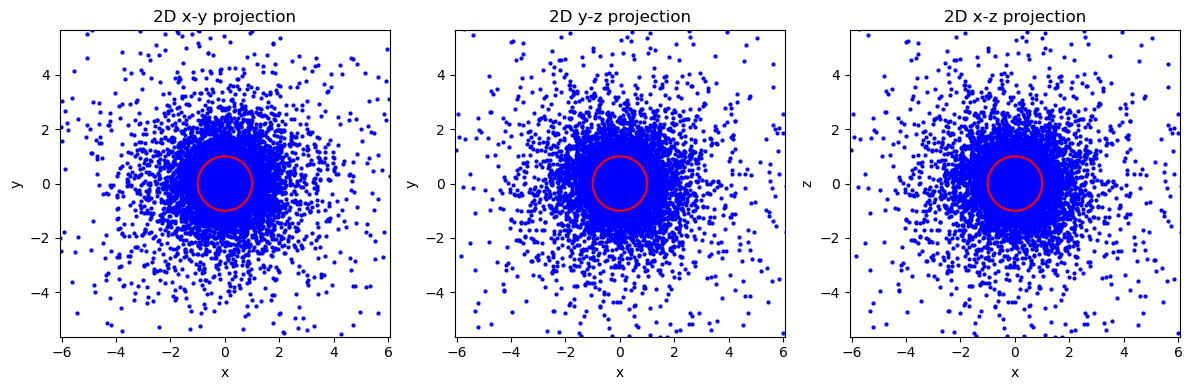

In [42]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, c = 'blue', s=8)
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_title("Spatial distribution")
ax.set_box_aspect([1,1,1])

plt.show();

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Projection on x-y plane
theta = np.linspace(0, 2 * np.pi, 150)
a = b * np.cos( theta )
c = b * np.sin( theta )
axes[0].scatter(x, y, c='blue', s=4)
axes[0].plot(a, c, c='red', label='b')
axes[0].axis('equal')
axes[0].set_xlim(-5, 5)
axes[0].set_ylim(-5, 5)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('2D x-y projection')

# Projection on y-z plane
axes[1].scatter(y, z, c='blue', s=4)
axes[1].plot(a, c, c='red', label='b')
axes[1].axis('equal')
axes[1].set_xlim(-5, 5)
axes[1].set_ylim(-5, 5)
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('2D y-z projection')


# Projection on x-z plane
axes[2].scatter(y, z, c='blue', s=4)
axes[2].plot(a, c, c='red', label='b')
axes[2].axis('equal')
axes[2].set_xlim(-5, 5)
axes[2].set_ylim(-5, 5)
axes[2].set_xlabel('x')
axes[2].set_ylabel('z')
axes[2].set_title('2D x-z projection')

plt.tight_layout()
plt.show()

Now we have to set the initial conditions for the distribution of velocities. 
Given all the radii, we start by computing the potential at each radius using the analytical expression:
$$ \Psi = - \frac{1}{\sqrt{1 + \frac{r^2}{3b^2}}} $$

In [9]:
Psi = np.zeros(len(Rays))
for i in range(0,len(Rays)):
    Psi[i] = - (1 + (Rays[i])**2 / (3*b**2))**(-1/2)

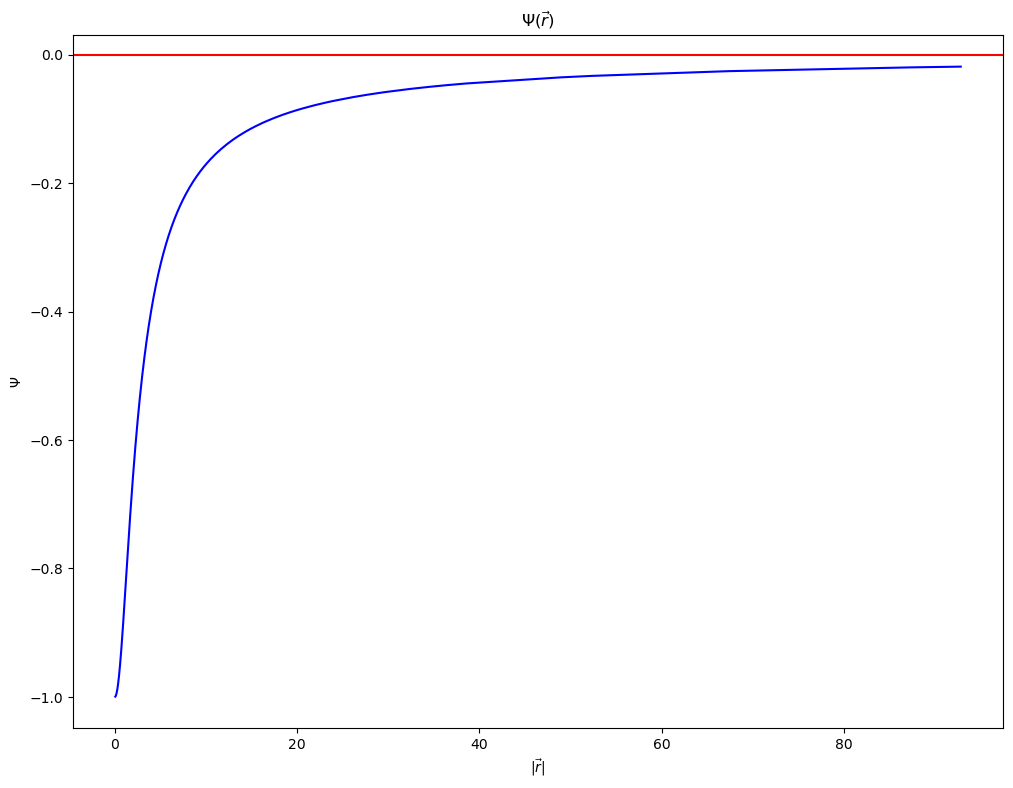

In [10]:
# Plot of the potential
plt.figure(figsize=(12,9))
plt.plot(Rays[np.argsort(Rays)], Psi[np.argsort(Rays)], c='blue')
plt.axhline(xmin=0, xmax=np.max(Rays), y=0, c='red')
plt.xlabel(r"$|\vec{r}|$")
plt.ylabel(r'$\Psi$')
plt.title(r'$\Psi(\vec{r})$')
plt.show()


In [11]:
max_pot = np.max(abs(Psi))
print(max_pot)

0.9996337666207796


The cumulative function $F(\varepsilon)$ is given by:
$$ F(\varepsilon) \propto \int_0^v \Big( \Psi - \frac{v^2}{2} \Big)^{\frac{7}{2}} v^2 dv $$
And by the substitution $ q = \frac{v}{\sqrt{2\Psi}} $ we obtain:
$$ F(\varepsilon) \propto \int_0^1 ( 1- q^2 )^{\frac{7}{2}} q^2 dq $$

The new $f(q)$ found has a maximum in $q=0.471$ where it assumes the value 0.092. So we can define a new function $g(q) = 0.092$ defined in the interval [0,1]

# Applying the Montecarlo rejection method

In [12]:
import random
q_min = 0
q_max = 1 
f_max = 0.092
y_q = 1

q = np.zeros(N)
f_q = np.zeros(N)
G = 0

for i in range(0, N):
    while y_q > (1 - q[i]**2)**(7/2) * q[i]**2:
        q[i] = uniform.rvs(0,1)
        y_q = uniform.rvs(0, 0.092)
        f_q[i] = y_q
        
    #G = uniform.rvs(0,1)
    #q[i] = G / 0.092


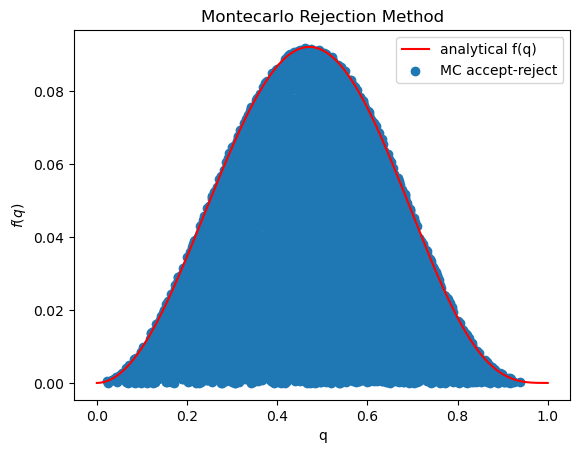

In [13]:
q_teo = np.linspace(0, 1, 1000)
plt.plot(q_teo, (1 - q_teo**2)**(7/2) * q_teo**2, color='r', label='analytical f(q)')
plt.scatter(q, f_q, label='MC accept-reject')
plt.xlabel('q')
plt.ylabel(r'$f(q)$')
plt.title('Montecarlo Rejection Method')
plt.legend()

In [14]:
velocities = q * np.sqrt(2 * -Psi)

In [15]:
theta_v = np.zeros(N)
phi_v = np.zeros(N)
v_x = np.zeros(N)
v_y = np.zeros(N)
v_z = np.zeros(N)

cdf_theta = uniform.rvs(0, 1, size=N)  # cumulative function of thetas


for i in range(0, N):
    theta_v[i] = np.arccos(1 - 2 * cdf_theta[i])
    #theta_v[i] = uniform.rvs(0, np.pi)
    phi_v[i] = uniform.rvs(0, 2*np.pi)
    
    v_x[i] = velocities[i] * np.sin(theta_v[i]) * np.cos(phi_v[i])
    v_y[i] = velocities[i] * np.sin(theta_v[i]) * np.sin(phi_v[i])
    v_z[i] = velocities[i] * np.cos(theta_v[i])
  

In [16]:
v_esc_max = np.sqrt(max_pot * 2)
print(v_esc_max)

1.4139545725523006


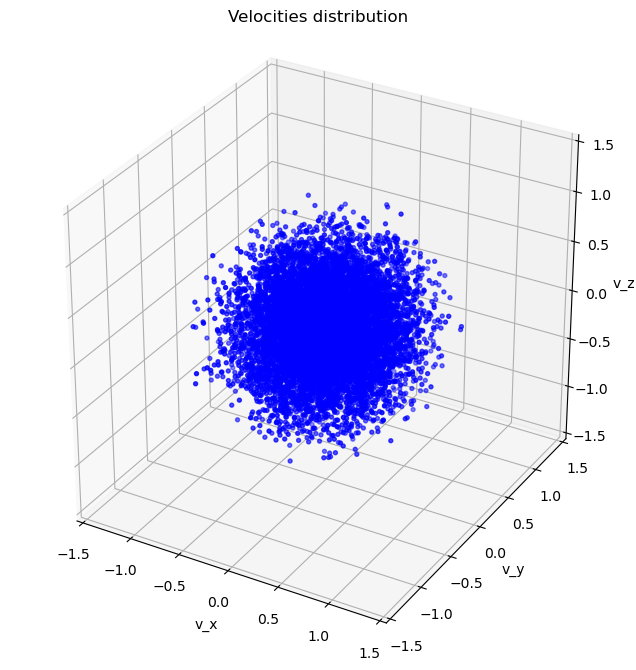

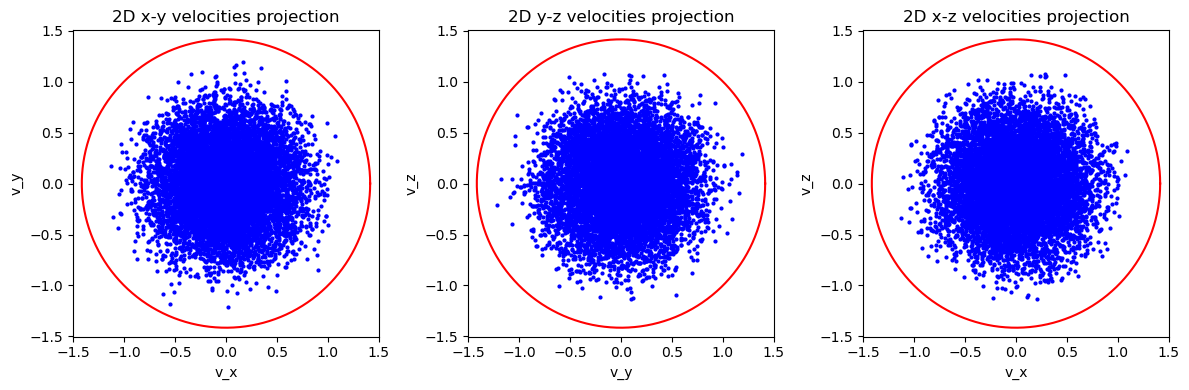

In [17]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(v_x, v_y, v_z, c = 'blue', s=8)
ax.set_aspect('equal')
ax.set_xlabel('v_x')
ax.set_ylabel('v_y')
ax.set_zlabel('v_z')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)
ax.set_title("Velocities distribution")
plt.show();

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

#Projection on x-y plane
theta = np.linspace(0, 2 * np.pi, 150)
a = v_esc_max * np.cos( theta )
c = v_esc_max * np.sin( theta )
axes[0].scatter(v_x, v_y, c='blue', s=4)
axes[0].plot(a, c, c='red', label='v_esc')
axes[0].axis('equal')
axes[0].set_xlim(-1.5, 1.5)
axes[0].set_ylim(-1.5, 1.5)
axes[0].set_xlabel('v_x')
axes[0].set_ylabel('v_y')
axes[0].set_title('2D x-y velocities projection')


# Projection on y-z plane
axes[1].scatter(v_y, v_z, c='blue', s=4)
axes[1].plot(a, c, c='red', label='v_esc')
axes[1].axis('equal')
axes[1].set_xlim(-1.5, 1.5)
axes[1].set_ylim(-1.5, 1.5)
axes[1].set_xlabel('v_y')
axes[1].set_ylabel('v_z')
axes[1].set_title('2D y-z velocities projection')



# Projection on x-z plane
axes[2].scatter(v_x, v_z, c='blue', s=4)
axes[2].plot(a, c, c='red', label='v_esc')
axes[2].axis('equal')
axes[2].set_xlim(-1.5, 1.5)
axes[2].set_ylim(-1.5, 1.5)
axes[2].set_xlabel('v_x')
axes[2].set_ylabel('v_z')
axes[2].set_title('2D x-z velocities projection')


plt.tight_layout()
plt.show()

# Building the txt file with the initial conditions

In [18]:
# open the file
file = open('plummer_equilibrium_initial.txt', 'w')

# write the file
file.write(f'{N}\n')
file.write('3\n') # dimensions
file.write('0\n')

for i in range(N):
    file.write(f'{m}\n')

for i in range(N):
    file.write(f'{x[i]} {y[i]} {z[i]}\n')
    
for i in range(N):
    file.write(f'{v_x[i]} {v_y[i]} {v_z[i]}\n')

# close the file
file.close()